# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import seaborn as sns

# Import API key #key disabled
from api_keys import api_key
#api_key = "  "

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries =[]
lats = []
lngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    #lat = citipy.nearest_city(lat_lng[0], lat_lng[1]).
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        
# Print the city count to confirm sufficient count
len(cities)


638

In [3]:
#create DataFrame

cities_df = pd.DataFrame({ 
    "City": cities, 
    "Country": countries,
           })

cities_df

,City,Country
0,bilma,ne
1,yulara,au
2,kodiak,us
3,tasiilaq,gl
4,new norfolk,au
5,tongliao,cn
6,mataura,pf
7,bredasdorp,za
8,omboue,ga
9,port alfred,za


In [4]:
#create columns for fields
cities_df["Temperature"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""


cities_df

,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,bilma,ne,,,,,,
1,yulara,au,,,,,,
2,kodiak,us,,,,,,
3,tasiilaq,gl,,,,,,
4,new norfolk,au,,,,,,
5,tongliao,cn,,,,,,
6,mataura,pf,,,,,,
7,bredasdorp,za,,,,,,
8,omboue,ga,,,,,,
9,port alfred,za,,,,,,


In [5]:
#url
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"


In [6]:
count = 1

print("Beginning Data Retrieval")

for index, row in cities_df.iterrows():
    time.sleep(0.1)
    target_city = row["City"]
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + target_city.replace(" ", "+")
    #print log to ensure loop is working #Processing Record 1 of Set 1 | lompoc 
    print("Processing Record " + str(count) + "|" + str(target_city))
    #print(query_url)
    count += 1
    #Ger json of weather data
    city_weather = requests.get(query_url).json()
    
    try:
        temperature = city_weather["main"]["temp"]
        humidity = city_weather["main"]["humidity"]  
        cloudiness = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        latitude2 = city_weather['coord']['lat']
        longitude2 = city_weather['coord']['lon']
        
        cities_df.set_value(index, "Temperature", temperature)
        cities_df.set_value(index,"Humidity", humidity)
        cities_df.set_value(index,"Cloudiness", cloudiness)
        cities_df.set_value(index,"Wind Speed", wind_speed)
        cities_df.set_value(index,"Latitude", latitude2)
        cities_df.set_value(index,"Longitude", longitude2)
    except:
        print("Error with weather data, skipping.")

print("Data Retrieval Complete.")

Beginning Data Retrieval
Processing Record 1|bilma


C:\Users\JB52612\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\JB52612\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\JB52612\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\JB52612\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\JB52612\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\JB52612\Ana

Processing Record 2|yulara
Processing Record 3|kodiak
Processing Record 4|tasiilaq
Processing Record 5|new norfolk
Processing Record 6|tongliao
Processing Record 7|mataura
Processing Record 8|bredasdorp
Processing Record 9|omboue
Processing Record 10|port alfred
Processing Record 11|katherine
Processing Record 12|isangel
Processing Record 13|rikitea
Processing Record 14|varhaug
Processing Record 15|barrow
Processing Record 16|kazalinsk
Error with weather data, skipping.
Processing Record 17|mount gambier
Processing Record 18|aklavik
Processing Record 19|vestmanna
Processing Record 20|hearst
Processing Record 21|qaanaaq
Processing Record 22|xuddur
Processing Record 23|petropavlovsk-kamchatskiy
Processing Record 24|busselton
Processing Record 25|vaini
Processing Record 26|karkaralinsk
Error with weather data, skipping.
Processing Record 27|carnarvon
Processing Record 28|albany
Processing Record 29|yerbogachen
Processing Record 30|bethel
Processing Record 31|honningsvag
Processing Record 

Processing Record 239|burica
Error with weather data, skipping.
Processing Record 240|dubreka
Processing Record 241|nara
Processing Record 242|gladstone
Processing Record 243|tuatapere
Processing Record 244|barentsburg
Error with weather data, skipping.
Processing Record 245|rungata
Error with weather data, skipping.
Processing Record 246|mandla
Processing Record 247|roma
Processing Record 248|teguise
Processing Record 249|lebu
Processing Record 250|arman
Processing Record 251|hovd
Processing Record 252|fortuna
Processing Record 253|poya
Processing Record 254|nome
Processing Record 255|alta floresta
Processing Record 256|kaduna
Processing Record 257|bonavista
Processing Record 258|lensk
Processing Record 259|bulawayo
Processing Record 260|cabedelo
Processing Record 261|diu
Processing Record 262|aguimes
Processing Record 263|mwingi
Processing Record 264|mehamn
Processing Record 265|gorkovskoye
Error with weather data, skipping.
Processing Record 266|sovetskiy
Processing Record 267|astar

Processing Record 472|sorong
Processing Record 473|mercedes
Processing Record 474|wallaceburg
Processing Record 475|talcahuano
Processing Record 476|nalchiti
Processing Record 477|goderich
Processing Record 478|lolua
Error with weather data, skipping.
Processing Record 479|novaya chigla
Processing Record 480|jilin
Processing Record 481|iqaluit
Processing Record 482|dingle
Processing Record 483|hihifo
Error with weather data, skipping.
Processing Record 484|red bank
Processing Record 485|high prairie
Processing Record 486|lorengau
Processing Record 487|puerto escondido
Processing Record 488|ambon
Processing Record 489|pisco
Processing Record 490|yenangyaung
Processing Record 491|dera bugti
Processing Record 492|san rafael del sur
Processing Record 493|rio grande
Processing Record 494|grand gaube
Processing Record 495|ibotirama
Processing Record 496|amapa
Processing Record 497|margate
Processing Record 498|biak
Processing Record 499|samana
Processing Record 500|bonga
Processing Record 50

In [7]:
cities_df


,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,bilma,ne,72.91,27,0,10.92,18.69,12.92
1,yulara,au,66.2,88,75,13.87,-25.24,130.99
2,kodiak,us,46.4,100,1,4.7,39.95,-94.76
3,tasiilaq,gl,26.6,79,92,32.21,65.61,-37.64
4,new norfolk,au,50,43,75,25.28,-42.78,147.06
5,tongliao,cn,43.21,46,0,20.54,43.61,122.27
6,mataura,pf,50.14,96,92,5.21,-46.19,168.86
7,bredasdorp,za,68,88,64,10.29,-34.53,20.04
8,omboue,ga,79.57,100,88,5.44,-1.57,9.26
9,port alfred,za,68.59,98,92,5.88,-33.59,26.89


In [8]:
cities_df.dtypes


City           object
Country        object
Temperature    object
Humidity       object
Cloudiness     object
Wind Speed     object
Latitude       object
Longitude      object
dtype: object

In [9]:
cities_df.to_csv("WorldWeatherData.csv", index=False)

In [10]:
#change dtypes to float
latitude_three = pd.to_numeric(cities_df["Latitude"])
temp = pd.to_numeric(cities_df["Temperature"])
humidity_three = pd.to_numeric(cities_df["Humidity"])
cloudiness_three = pd.to_numeric(cities_df["Cloudiness"])
windiness_three = pd.to_numeric(cities_df["Wind Speed"])
longitude_three = pd.to_numeric(cities_df["Longitude"])


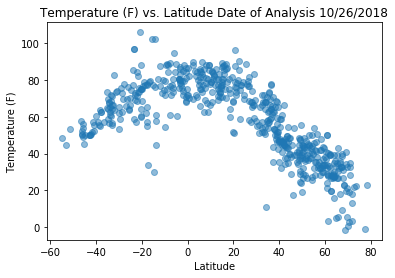

In [11]:
#Temp vs latitude
plt.scatter(latitude_three, temp, alpha = 0.5)

plt.title("Temperature (F) vs. Latitude Date of Analysis 10/26/2018")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Temperature.png")
plt.show()

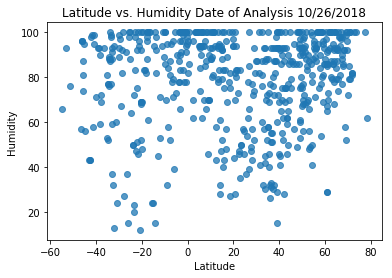

In [12]:
#humidity vs latitude
plt.scatter(latitude_three, humidity_three, alpha = 0.75)

plt.title("Latitude vs. Humidity Date of Analysis 10/26/2018")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity.png")
plt.show()

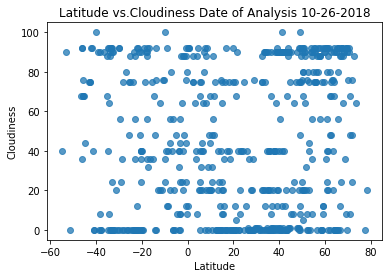

In [13]:
#cloudiness vs latitude
plt.scatter(latitude_three, cloudiness_three, alpha = 0.75)

plt.title("Latitude vs.Cloudiness Date of Analysis 10-26-2018")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness.png")
plt.show()

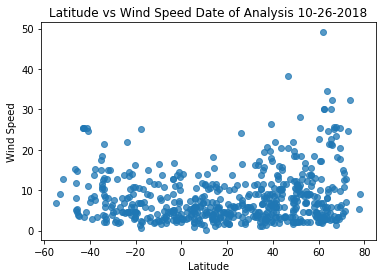

In [14]:
#windiness vs latitude
plt.scatter(latitude_three, windiness_three, alpha= 0.75)

plt.title("Latitude vs Wind Speed Date of Analysis 10-26-2018")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Wind Speed.png")
plt.show()

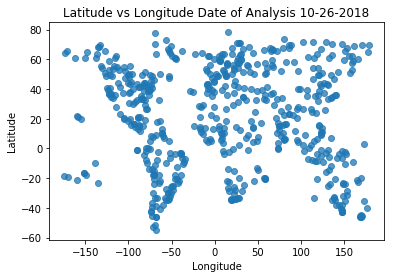

In [15]:
#longitude vs latitude
plt.scatter(longitude_three, latitude_three, alpha= 0.75)

plt.title("Latitude vs Longitude Date of Analysis 10-26-2018")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.savefig("Wind Speed.png")
plt.show()